# Praca Domowa 1
#### Majczyk Adam

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('students.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


## 1 - Rozmiar danych

In [3]:
df.shape

(1044, 34)

## 2 - Analiza braków danych, typy zmiennych

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
class         0
dtype: int64

#### 2 - Wnioski 
* W datasecie nie ma braków danych
* mamy 
    * 16 zmiennych (kolumn) numerycznych całkowitych
    * 18 zmiennych (kolumn) tekstowych
* kilka zmiennych tekstowych zawiera informacje typu yes/no (lub innych binarnych) - możnaby zastąpić je zmiennymi numerycznymi 


## 3 - Miary tendencji centralnej i miary dyspersji

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


## 4 - Analiza korelacji zmiennych

<AxesSubplot:>

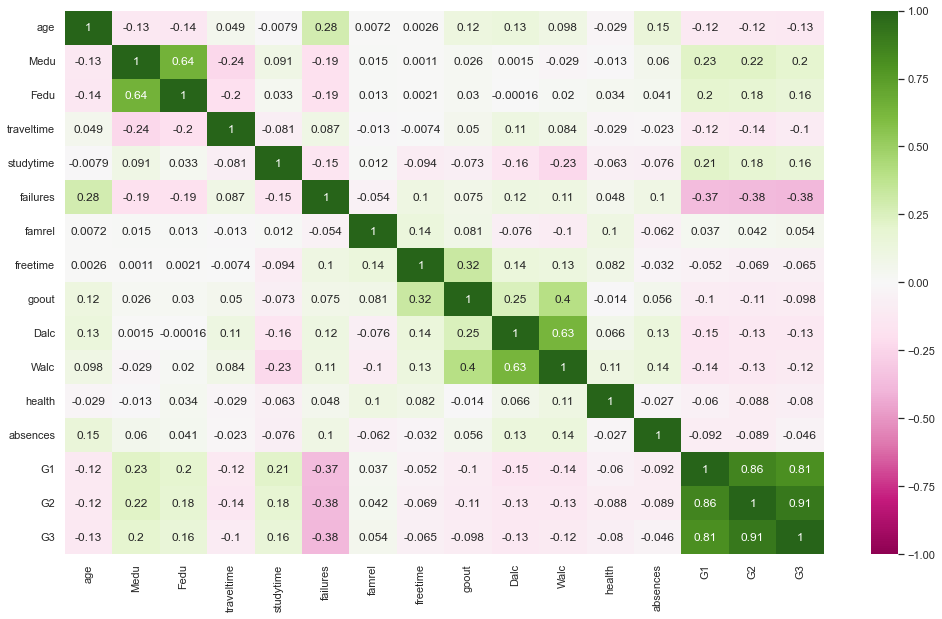

In [7]:
sns.set(rc = {'figure.figsize':(17,10)})
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, 
        annot = True, 
        vmin = -1, vmax = 1,
        cmap="PiYG")

#### 4 - Wnioski:
* Wysoce (>=0.5) skorelowane są: 
    * G1, G2, G3
    * Dalc, Walc
    
* Skorelowane są: 
    * gout, Walc
    * duration, customer_type
    * present_residance, age
    * failures, age

* Ujemnie skorelowane są: 
    * failures, G1
    * failures, G2
    * failures, G3

może warto pozostawić po 1 zmiennej z danej grupy

## 5 - Rozkłady zmiennych

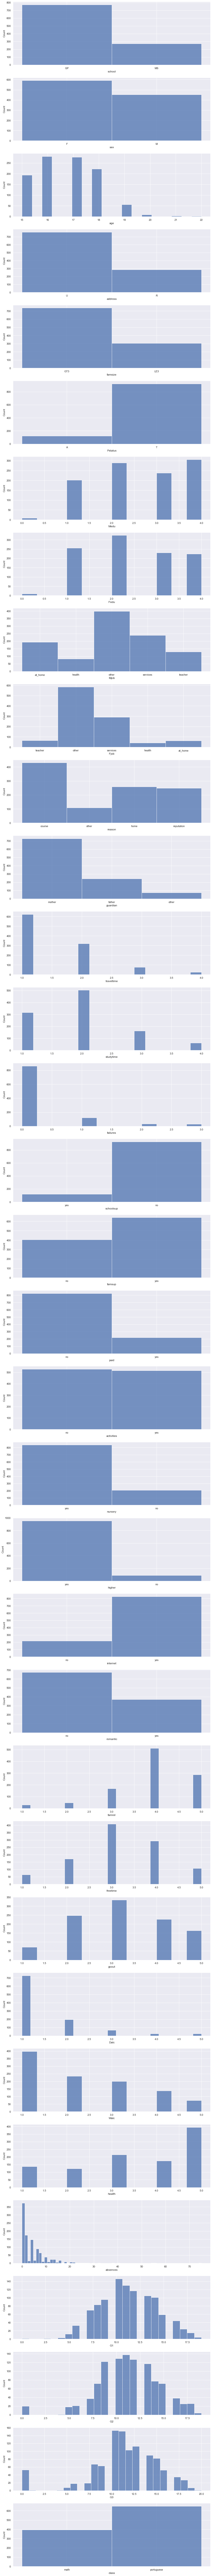

In [8]:
fig, axs = plt.subplots(nrows=34, figsize=(15,200))
iter = 0
for i in list(df):
    sns.histplot(x = df[i], ax = axs[iter])
    iter+=1
plt.show()

#### 5 - Wnioski (1/2)
* Kolumna absences odbiega od rozkładu normalnego - logarytm mógłby to naprawić.
* Wiele zmiennych (np. famrel, romantic) jest numerycznych, ale przyjmuje około 5 wartości dyskretnych. Zależnie od wybranego przez nas później algorytmu można by zamienić je na kategoryczne.
* Oceny (G1-G3) przypominają, zgodnie z oczekiwaniem, rozkład normalny.

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)

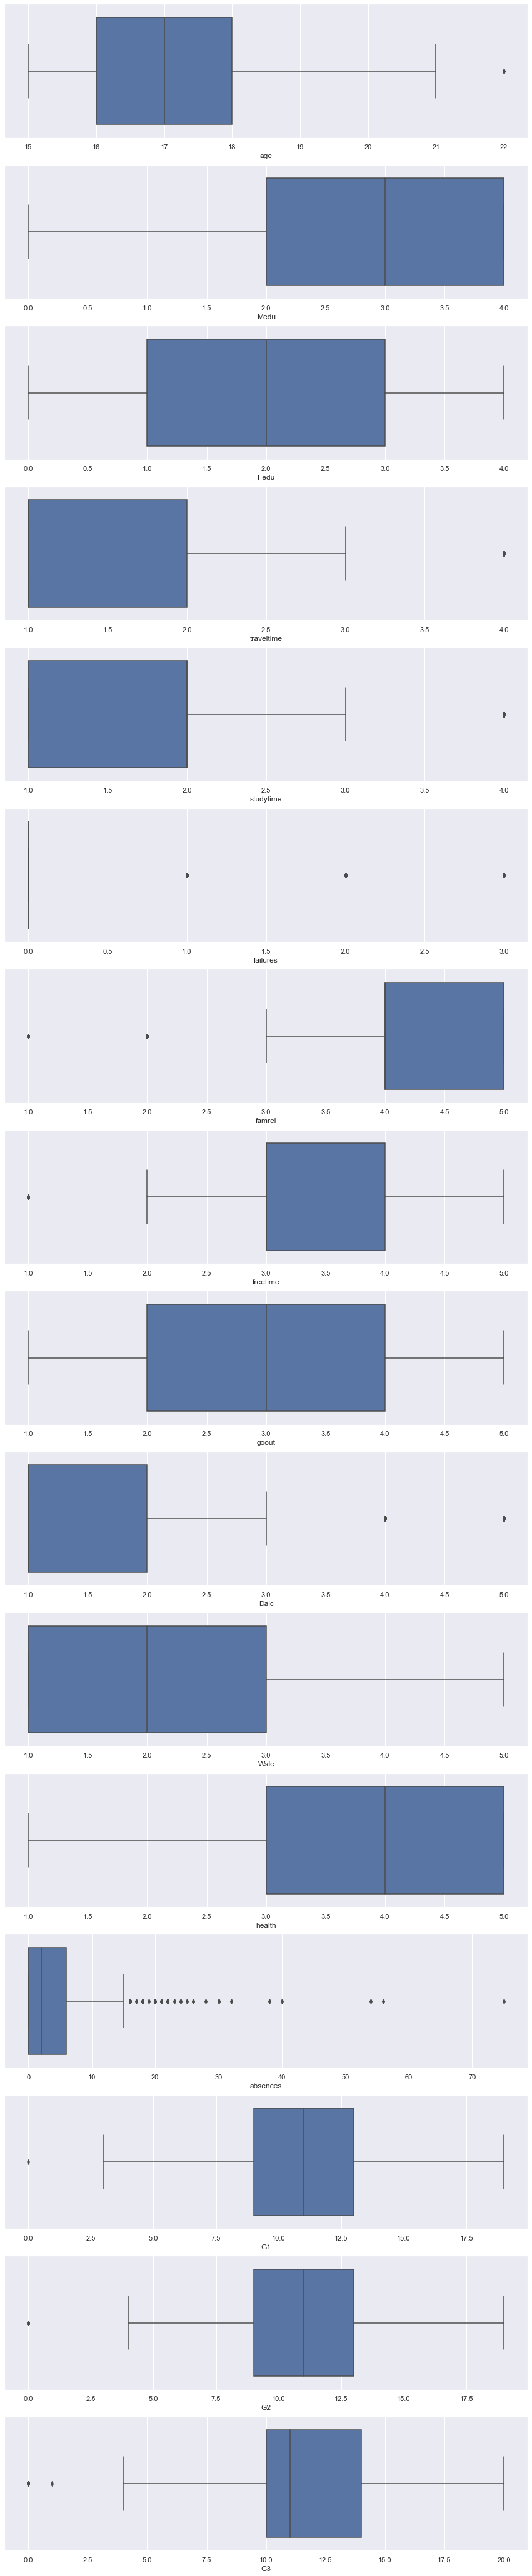

In [10]:
fig, axs = plt.subplots(nrows=16, figsize=(15,75))
iter = 0
for i in list(df_numeric):
    sns.boxplot(x = df[i], ax = axs[iter])
    iter+=1
plt.show()


#### 5 - Wnioski (2/2)
* Znowu uwagę zwraca zmienna absences - ma dużo outlierów - powinniśmy zastanowić się nad transformacją

## 6 - Zależności między zmiennymi

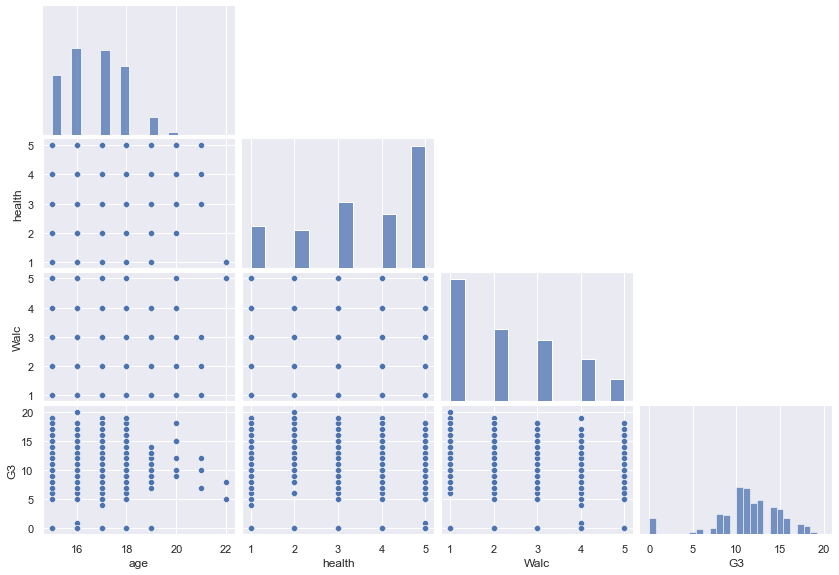

In [16]:
sns.pairplot(df_numeric[["age", "health", "Walc", "G3"]], corner=True)

plt.gcf().set_size_inches(12,8)
plt.show()


### Zbadajmy zależności kilku par zmiennych, które mogą mieć zależności

#### Zobaczmy jak ocena zdrowia wpływa na związki romantyczne

<AxesSubplot:xlabel='romantic', ylabel='Count'>

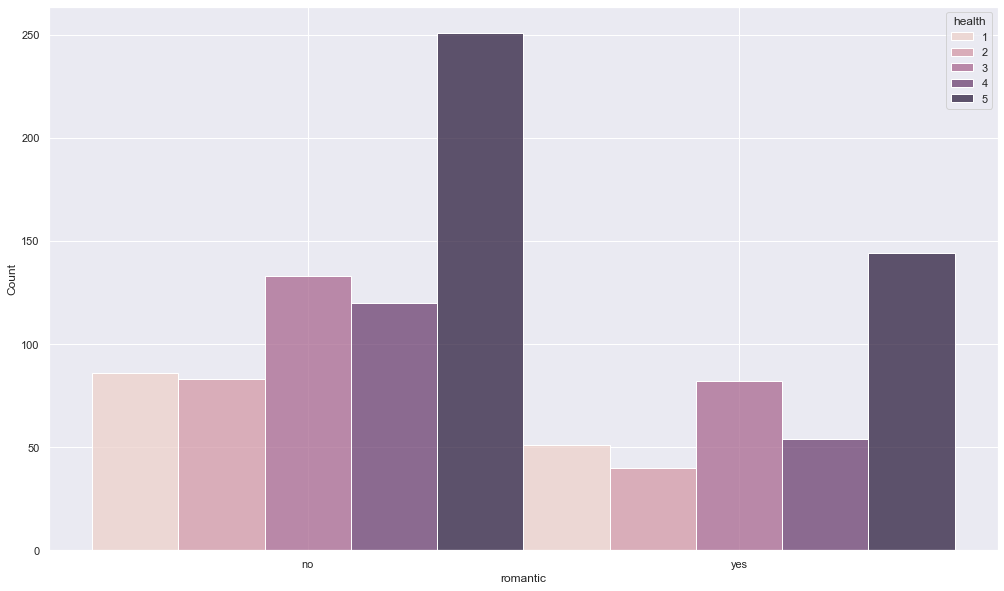

In [12]:
sns.histplot(data = df, x = "romantic", hue = "health", multiple = "dodge")

#### Zobaczmy jak wiek wpływa na spożycie alkoholu w weekendy

<AxesSubplot:xlabel='age', ylabel='Count'>

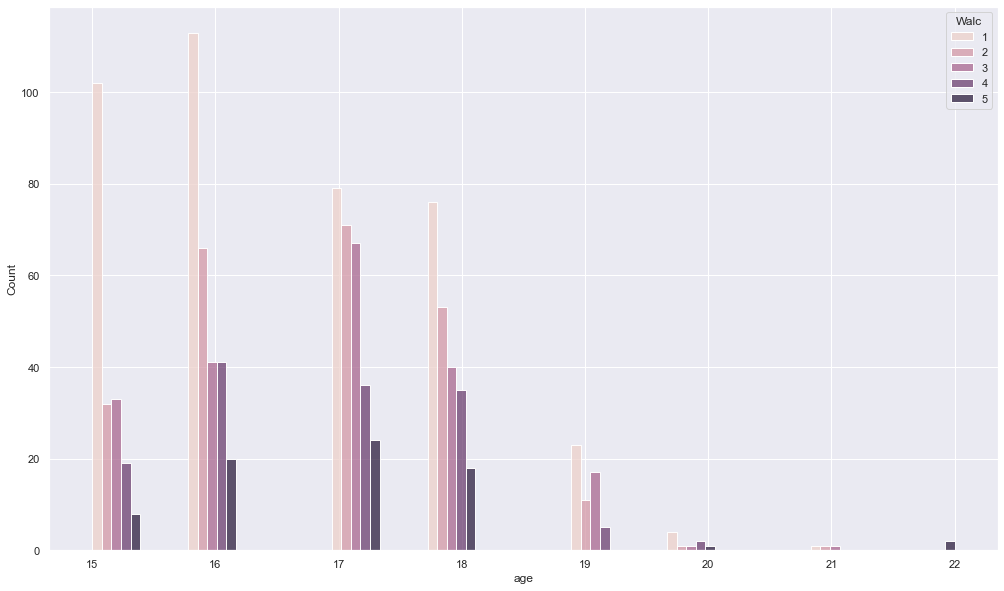

In [13]:
sns.histplot(data = df, x = "age", hue = "Walc", multiple = "dodge")

Co ciekawe piją głownie młodsi (może to być spowodowane jednak tym, że starszych (>=20 lat) jest dużo mniej w tabeli. 

Możemy za to zaobeserwować, że sporo osób w wieku 15 i 16 lat spożycie alhoholu ocenia na niskie, a im starsze tym udział niskiego spożycia alkoholu maleje.

#### A jak alkohol wpływa na ocenę końcową (G3)?

<AxesSubplot:xlabel='G3', ylabel='Count'>

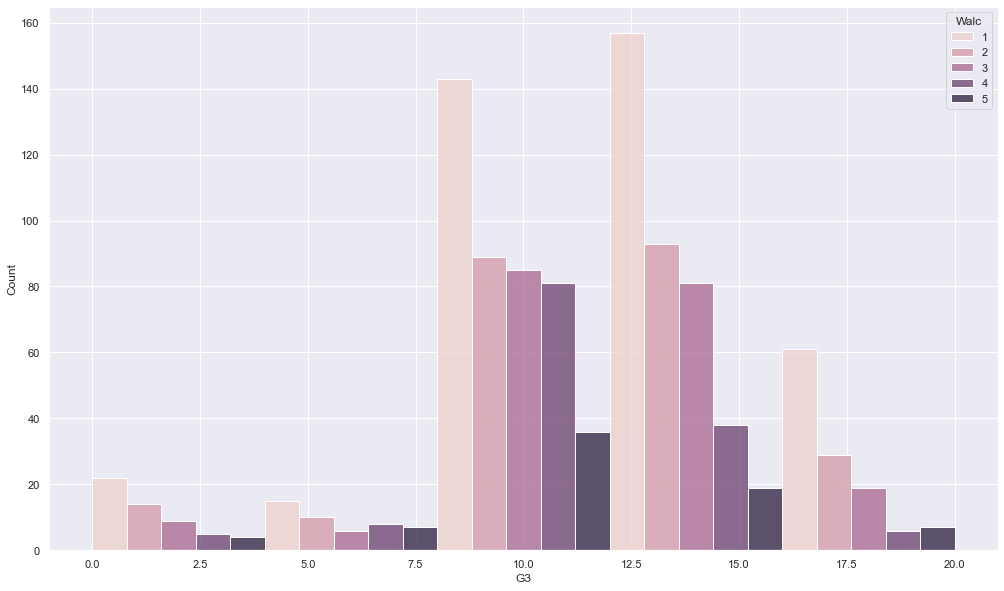

In [14]:
sns.histplot(data = df, x = "G3", hue = "Walc", multiple = "dodge", bins = 5)

Możemy zauważyć, że dla wyników 4-8 mamy duży udział wysokiego do niskiego spożycia alkoholu, a w grupie ocen 16-20 dużo mniejszy procent osób deklaruje wysokie spożycie alkoholu.